<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#unchanged" data-toc-modified-id="unchanged-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>unchanged</a></span></li><li><span><a href="#hot--test" data-toc-modified-id="hot--test-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>hot  test</a></span></li><li><span><a href="#time-test" data-toc-modified-id="time-test-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>time test</a></span></li></ul></div>

## unchanged

In [20]:
### import things
import pandas as pd
import copy
### read form the csv doc
data_train = pd.read_csv('train.csv')  
data_test = pd.read_csv('test.csv')

### trans to array
train_array = np.array(data_train)
test_array = np.array(data_test)

###############hyper parameter
use_normA=0
use_normy=0
###############hyper parameter

### process the A to be norm or not
if use_normA==1: 
    A_before_norm = train_array
    A=np.empty(np.shape(A_before_norm))
    for i in range(np.shape(A_before_norm)[1]):
        temp=A_before_norm[:,i]/np.linalg.norm(A_before_norm[:,i])
        A[:,i]=temp
else:
    A = train_array

### the A shape
[d,n] = A.shape


### aha! same as the lambda, the L-1 norm coefficent
lamb=1e-4

### the learning rate 0.15/(the proxi-L constant)
alpha=0.15/(0.25*max(sum(A*A)))
# alpha=0.15/(0.25*max(sum(A*A))+lamb)

### try bigger learning
# alpha=3*alpha


### loops
iters_outer=2
iters_inner=2*d

### count the number bingo
right=0

xx_0=np.zeros([85*67,67])
for i in range(67):
    xx_0[i*85:i*85+85][:,i]=1

for k in range(100):
    rand_index=np.random.randint(85*67)
#     print('rand_index',rand_index)
    rand_who=int(rand_index/85)
#     print('rand_who',rand_who)
    
    #### which y version you use, norm processed or the plain one 
    if use_normy==1:
        temp_y = test_array[:,rand_index].reshape(d,1)
        y=np.empty(np.shape(temp_y))
        y=temp_y/np.linalg.norm(temp_y)
    else:
        y=test_array[:,rand_index].reshape(d,1)
    
    ### initialize the two ws
    w_prev=np.array(np.zeros([n,1]))
    w_tilda=np.array(np.zeros([n,1]))
    ww_prev=np.array(np.zeros([n,1]))
    ### big loop
    for i in range(iters_outer):
        ### the vrsgd things
        tau=max(2/(i+2),0.1818) 
        alpha2=alpha/tau
        alpha1=lamb*alpha2
        ### compute the full gradient
        mu=(-A.T).dot(y-A.dot(w_tilda))/d
        ##small loop
        for j in range(iters_inner):
            ### choose a rand one from d 
            idx=np.random.randint(0,d)
            ### A transpose, need reshape
            A_idx=A[idx].T.reshape(n,1)
            ### g_prev and tilda
            g_prev=(-A_idx).dot(y[idx]-(A[idx].reshape(1,n)).dot(w_prev)) 
            g_tilda=(-A_idx).dot(y[idx]-(A[idx].reshape(1,n)).dot(w_tilda)) 
            ### update the parameter
            w_prev=w_prev-alpha2*(g_prev-g_tilda+mu)
            ### the soft thresholding
            temp=w_prev-alpha1
            temp=(temp+abs(temp))/2
            w_prev=np.sign(w_prev)*temp
            ### sum the w_prev in the inner loop
            ww_prev+=w_prev
#             ww_prev=0.2*ww_prev+0.8*w_prev ## seem momentum dont work

        ### assign the w_tilda for another loop  
        ## opt1
        w_tilda=copy.deepcopy(ww_prev/iters_inner)
        ##opt2
#         w_tilda=copy.deepcopy(w_prev)
#         w_prev=copy.deepcopy(w_tilda)


        
    res_min=1e9
    for m in range(np.shape(xx_0)[1]):
        temp=xx_0[:,m].reshape(5695,1)
        x_phi=w_tilda*temp
#         res=sum((y-A.dot(x_phi))*(y-A.dot(x_phi)))
        res=sum((y-A.dot(x_phi))*(y-A.dot(x_phi)))+lamb*sum(x_phi<1e-6)


        if res<res_min:
            res_min=res
            index_min=m

    print('rand_index',rand_index)
    print('randwho and index_min',rand_who,index_min)
#     print('detect and rand_who',detect,rand_who)
#     print('rand_index',rand_index)
#     print('rand_who',rand_who)
#     print('*'*80)
#     if detect == rand_who:
#         right=right+1

    if rand_who == index_min:
        right=right+1


    
    
    

rand_index 578
randwho and index_min 6 6
rand_index 3690
randwho and index_min 43 43
rand_index 3414
randwho and index_min 40 50
rand_index 108
randwho and index_min 1 64
rand_index 5251
randwho and index_min 61 61
rand_index 3553
randwho and index_min 41 41
rand_index 4619
randwho and index_min 54 54
rand_index 4039
randwho and index_min 47 47
rand_index 2468
randwho and index_min 29 56
rand_index 2916
randwho and index_min 34 19
rand_index 1304
randwho and index_min 15 45
rand_index 1831
randwho and index_min 21 21
rand_index 2852
randwho and index_min 33 33
rand_index 3702
randwho and index_min 43 43
rand_index 1929
randwho and index_min 22 50
rand_index 4070
randwho and index_min 47 47
rand_index 1738
randwho and index_min 20 20
rand_index 3234
randwho and index_min 38 19
rand_index 4688
randwho and index_min 55 15
rand_index 3433
randwho and index_min 40 40
rand_index 3490
randwho and index_min 41 41
rand_index 466
randwho and index_min 5 5
rand_index 2670
randwho and index_min 31

In [21]:
right

77

## hot  test

In [63]:
### import things
import pandas as pd
import copy 
import seaborn as sns
### read form the csv doc
data_train = pd.read_csv('train.csv')  
data_test = pd.read_csv('test.csv')

### trans to array
train_array = np.array(data_train)
test_array = np.array(data_test)

###############hyper parameter
use_normA=0
use_normy=0
###############hyper parameter

###############functions

### determin the x_tilda
def cp(x):
    return copy.deepcopy(x)

### get w_tilda
def compute_w_tilda(iters_inner,w_prev,ww_prev,all_or_one='mix',alpha=0.8,beta=0.2):
    if all_or_one=='all':
        w_tilda=cp(ww_prev)/iters_inner
    elif all_or_one=='one':
        w_tilda=cp(w_prev)
    elif all_or_one=='mix':
        w_tilda= cp(alpha*(w_prev)+beta*(ww_prev/iters_inner))
    return w_tilda

### get the data matrix A
def get_A(use_normA,train_array):
    if use_normA==1: 
        A_before_norm = train_array
        A=np.empty(np.shape(A_before_norm))
        for i in range(np.shape(A_before_norm)[1]):
            temp=A_before_norm[:,i]/np.linalg.norm(A_before_norm[:,i])
            A[:,i]=temp
    else:
        A = train_array
    return A

### get alpha 
def compute_alpha(A,lamb):
    L_max=0.25*max(sum(A*A))
    alpha=0.15/(L_max+lamb)
    return alpha

def get_xx_0():
    xx_0=np.zeros([85*67,67])
    for i in range(67):
        xx_0[i*85:i*85+85][:,i]=1
    return xx_0

def compute_res(y,x_phi,lamb):
    return sum((y-A.dot(x_phi))*(y-A.dot(x_phi)))
    
def get_index_min(xx_0,w_tilda):
    res_min=1e9
    for m in range(np.shape(xx_0)[1]):
        temp=xx_0[:,m].reshape(5695,1)
        x_phi=w_tilda*temp
        res=compute_res(y,x_phi,lamb)
        if res<res_min:
            res_min=res
            index_min=m
    return index_min



###############functions


### process the A to be norm or not
A=get_A(0,train_array)
[d,n] = A.shape


### aha! same as the lambda, the L-1 norm coefficent
lamb=1e-5

### loops
iters_outer=1  # so many
iters_inner=d  # kd


### the learning rate 0.15/(the proxi-L constant+alpha)
alpha=compute_alpha(A,lamb)
### try bigger learning
# alpha=3*alpha

### make only part of the list to be none zero
xx_0=get_xx_0()


### count the number bingo when go through lots epochs
right=0


### choose a wrong one
rand_index=108
#     print('rand_index',rand_index)
rand_who=int(rand_index/85)
#     print('rand_who',rand_who)

#### which y version you use, norm processed or the plain one 
if use_normy==1:
    temp_y = test_array[:,rand_index].reshape(d,1)
    y=np.empty(np.shape(temp_y))
    y=temp_y/np.linalg.norm(temp_y)
else:
    y=test_array[:,rand_index].reshape(d,1)

### initialize the two ws
w_prev=np.array(np.zeros([n,1]))
w_tilda=np.array(np.zeros([n,1]))
ww_prev=np.array(np.zeros([n,1]))

### w_prev hotmap
w_prev_hot=np.empty([n,1])
hot_num=0
### big loop
for i in range(iters_outer):
    ### the vrsgd things
    tau=max(2/(i+2),0.1818) 
    alpha2=alpha/tau
    alpha1=lamb*alpha2
    ### compute the full gradient
    mu=(-A.T).dot(y-A.dot(w_tilda))/d
    ##small loop
    for j in range(iters_inner):
        ### choose a rand one from d 
        idx=np.random.randint(0,d)
        ### A transpose, need reshape
        A_idx=A[idx].T.reshape(n,1)
        ### g_prev and tilda
        g_prev=(-A_idx).dot(y[idx]-(A[idx].reshape(1,n)).dot(w_prev)) 
        g_tilda=(-A_idx).dot(y[idx]-(A[idx].reshape(1,n)).dot(w_tilda)) 
        ### update the parameter
        w_prev=w_prev-alpha2*(g_prev-g_tilda+mu)
        ### the soft thresholding
        temp=w_prev-alpha1
        temp=(temp+abs(temp))/2
        w_prev=np.sign(w_prev)*temp
        ### sum the w_prev in the inner loop
#         print(j)

        ### make the w_prev_hot
        w_prev_hot=np.concatenate((w_prev_hot,w_prev),axis=1)
        ### sum of the previous w_prev as ww_prev
        ww_prev+=w_prev
        
    ### assign the w_tilda for another loop  3 kinds one or all or other
    w_tilda=compute_w_tilda(iters_inner,w_prev,ww_prev,alpha=0.2,beta=0.8)



index_min=get_index_min(xx_0,w_tilda)

print(('rand_index',rand_index))
print(('randwho and index_min',rand_who,index_min))

if rand_who == index_min:
    right=right+1

('rand_index', 108)
('randwho and index_min', 1, 66)


In [78]:
sorted(w_prev)[-10:].index

<function list.index>

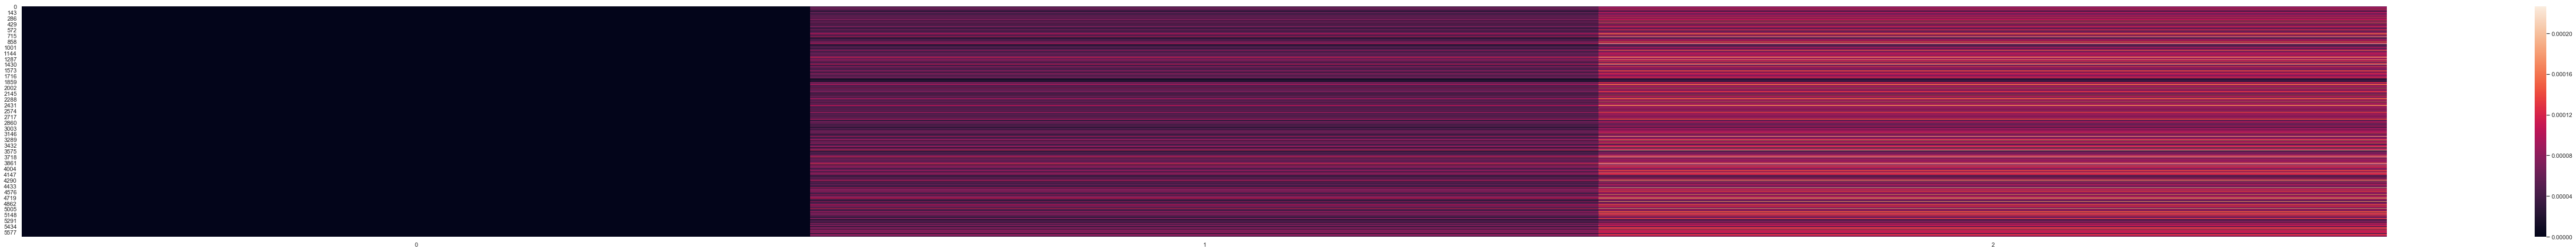

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(100,8))

sns.set(style='whitegrid', color_codes=True)


sns.heatmap(w_prev_hot)



## time test

In [4]:
### import things
import pandas as pd
import copy 
import seaborn as sns
import time

### read form the csv doc
data_train = pd.read_csv('train.csv')  
data_test = pd.read_csv('test.csv')

### trans to array
train_array = np.array(data_train)
test_array = np.array(data_test)

###############hyper parameter
use_normA=0
use_normy=0
###############hyper parameter

###############functions

### determin the x_tilda
def cp(x):
    return copy.deepcopy(x)

### get w_tilda
def compute_w_tilda(iters_inner,w_prev,ww_prev,all_or_one='mix',alpha=0.8,beta=0.2):
    if all_or_one=='all':
        w_tilda=cp(ww_prev)/iters_inner
    elif all_or_one=='one':
        w_tilda=cp(w_prev)
    elif all_or_one=='mix':
        w_tilda= cp(alpha*(w_prev)+beta*(ww_prev/iters_inner))
    return w_tilda

### get the data matrix A
def get_A(use_normA,train_array):
    if use_normA==1: 
        A_before_norm = train_array
        A=np.empty(np.shape(A_before_norm))
        for i in range(np.shape(A_before_norm)[1]):
            temp=A_before_norm[:,i]/np.linalg.norm(A_before_norm[:,i])
            A[:,i]=temp
    else:
        A = train_array
    return A

### get alpha 
def compute_alpha(A,lamb):
    L_max=0.25*max(sum(A*A))
    alpha=0.15/(L_max+lamb)
    return alpha

def get_xx_0():
    xx_0=np.zeros([85*67,67])
    for i in range(67):
        xx_0[i*85:i*85+85][:,i]=1
    return xx_0

def compute_res(y,x_phi,lamb):
    return sum((y-A.dot(x_phi))*(y-A.dot(x_phi)))
    
def get_index_min(xx_0,w_tilda):
    res_min=1e9
    for m in range(np.shape(xx_0)[1]):
        temp=xx_0[:,m].reshape(5695,1)
        x_phi=w_tilda*temp
        res=compute_res(y,x_phi,lamb)
        if res<res_min:
            res_min=res
            index_min=m
    return index_min

def compute_sci(xx_0,w):
    w_l1=np.linalg.norm(w,ord=1)
    temp_max=1e-9
    for m in range(np.shape(xx_0)[1]):
        temp=xx_0[:,m].reshape(5695,1)
        x_phi=w_tilda*temp
        x_phi_l1=np.linalg.norm(x_phi,ord=1)
        if x_phi_l1>temp_max:
            temp_max=x_phi_l1
    return (67*(temp_max/w_l1)-1)/(67-1)



###############functions


### process the A to be norm or not
A=get_A(0,train_array)
[d,n] = A.shape


### aha! same as the lambda, the L-1 norm coefficent
lamb=1e-5

### loops
iters_outer=2  # so many
iters_inner=2*d  # kd


### the learning rate 0.15/(the proxi-L constant+alpha)
alpha=compute_alpha(A,lamb)
### try bigger learning
# alpha=3*alpha

### make only part of the list to be none zero
xx_0=get_xx_0()


### count the number bingo when go through lots epochs
right=0


### choose a wrong one
rand_index=108
#     print('rand_index',rand_index)
rand_who=int(rand_index/85)
#     print('rand_who',rand_who)

#### which y version you use, norm processed or the plain one 
if use_normy==1:
    temp_y = test_array[:,rand_index].reshape(d,1)
    y=np.empty(np.shape(temp_y))
    y=temp_y/np.linalg.norm(temp_y)
else:
    y=test_array[:,rand_index].reshape(d,1)

### initialize the two ws
w_prev=np.array(np.zeros([n,1]))
w_tilda=np.array(np.zeros([n,1]))
ww_prev=np.array(np.zeros([n,1]))

### w_prev hotmap
w_prev_hot=np.empty([n,1])
hot_num=0
### big loop


### store the res and time
res_list=[]
time_list=[]
sci_list=[]
### count the time 
start = time.clock()
for i in range(iters_outer):
    ### the vrsgd things
    tau=max(2/(i+2),0.1818) 
    alpha2=alpha/tau
    alpha1=lamb*alpha2
    ### compute the full gradient
    mu=(-A.T).dot(y-A.dot(w_tilda))/d
    ##small loop
    for j in range(iters_inner):
        ### choose a rand one from d 
        idx=np.random.randint(0,d)
        ### A transpose, need reshape
        A_idx=A[idx].T.reshape(n,1)
        ### g_prev and tilda
        g_prev=(-A_idx).dot(y[idx]-(A[idx].reshape(1,n)).dot(w_prev)) 
        g_tilda=(-A_idx).dot(y[idx]-(A[idx].reshape(1,n)).dot(w_tilda)) 
        ### update the parameter
        w_prev=w_prev-alpha2*(g_prev-g_tilda+mu)
        ### the soft thresholding
        temp=w_prev-alpha1
        temp=(temp+abs(temp))/2
        w_prev=np.sign(w_prev)*temp
        
        ### compute the res of w_prev and store
        res_now=sum((y-A.dot(w_prev))*(y-A.dot(w_prev)))
        res_list.append(res_now)
        time_list.append(time.clock()-start)
        
        ### compute the sci value of w_prev and store
        sci_now=compute_sci(xx_0,w_prev)
        sci_list.append(sci_now)
        
        ### make the w_prev_hot
        w_prev_hot=np.concatenate((w_prev_hot,w_prev),axis=1)
        ### sum of the previous w_prev as ww_prev
        ww_prev+=w_prev
        
    ### assign the w_tilda for another loop  3 kinds one or all or other
    w_tilda=compute_w_tilda(iters_inner,w_prev,ww_prev,'all')



index_min=get_index_min(xx_0,w_tilda)

print(('rand_index',rand_index))
print(('randwho and index_min',rand_who,index_min))

if rand_who == index_min:
    right=right+1
    

time_list_name="npy/vrsgd"+'time_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'
res_list_name="npy/vrsgd"+'res_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'
sci_list_name="npy/vrsgd"+'sci_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'
np.save(time_list_name,time_list)
np.save(res_list_name,res_list)
np.save(sci_list_name,sci_list)


('rand_index', 108)
('randwho and index_min', 1, 45)


array([0.18623234])

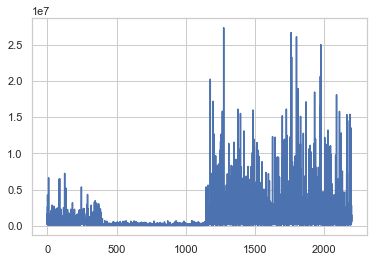

In [100]:
import matplotlib.pyplot as plt
plt.plot(time_list,res_list)

In [102]:
# plt.plot(time_list,res_list)

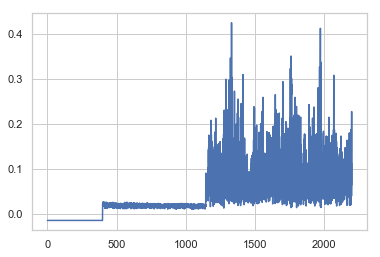

In [101]:
plt.plot(time_list,sci_list)

0.2

In [ ]:
# get_index_min(xx_0,w_tilda)

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(100,8))

sns.set(style='whitegrid', color_codes=True)


sns.heatmap(w_prev_hot)



KeyboardInterrupt



In [ ]:
1

array([[1., 3.],
       [2., 5.]])